# DECISION TREES AND RANDOM FOREST






Exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors).I am trying to create a model that will help predict people who have a profile of having a high probability of paying back.

Lending club had a very interesting year in 2016. This data is from before they even went public.

I'm using lending data from 2007-2010 and trying to classify and predict whether or not the borrower paid back their loan in full. The data is downloaded from here

Here are what the columns represent:

##### 1) credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
##### 2) purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
##### 3) int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
##### 4) installment: The monthly installments owed by the borrower if the loan is funded.
##### 5) log.annual.inc: The natural log of the self-reported annual income of the borrower.
##### 6) dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
##### 7) fico: The FICO credit score of the borrower.
##### 8) days.with.cr.line: The number of days the borrower has had a credit line.
##### 9) revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
##### 10) revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
##### 11) inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
##### 12) delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
##### 13) pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Import Data


In [1]:
import pandas as pd
loans = pd.read_csv('C:\\Users\\Neha\\Desktop\\DataSet\\LendingClub.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Check the columns present in dataset

In [2]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

### Check the shape of dataset

In [3]:
loans.shape

(9578, 14)

### Check the descriptive statistics of dataset

In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Check the info of the dataset

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Code to check if there is any missing values present in the dataset.

In [6]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### Data Visualisation

### Histogram of two FICO distribution on top of each other, one for each credit.policy

Text(0.5, 0, 'FICO')

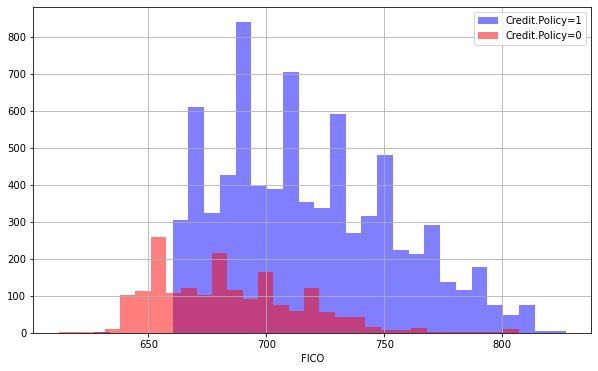

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')


### Histogram of two FICO distribution on top of each other, one for each not.fully.paid

Text(0.5, 0, 'FICO')

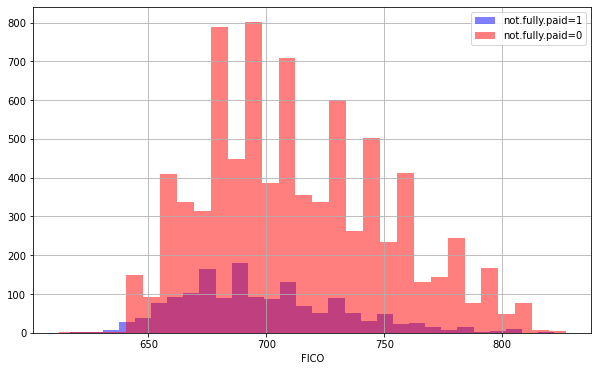

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')


### Using seaborn countplot show the counts of loans by purpose, with the color hue defined by not.fully.paid

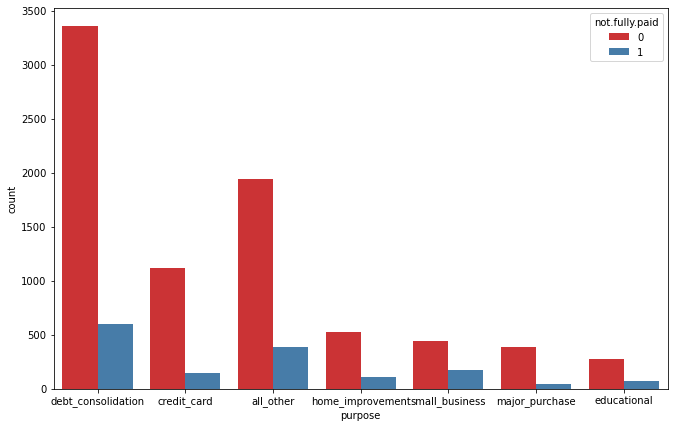

In [9]:
import seaborn as sns

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')


### Using a seaborn countplot understand the trend between FICO score and interest rate

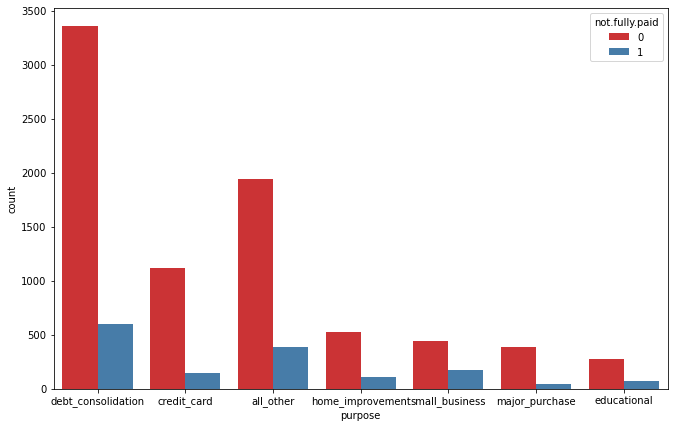

In [10]:
import seaborn as sns

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')


### Dealing with categorical variables.
['purpose']

The purpose column is categorical. so transform them using dummy variables using pd.get_dummies.

In [11]:
cat_feats = ['purpose']

In [12]:
loans.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

### Using pd.get_dummies create a fixed larger dataframe that has new feature columns with dummy variables.

In [13]:

final_data = pd.DataFrame()

final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
    

final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Extract the independent column to prepare X

In [14]:
X = pd.DataFrame()

X = final_data.drop('not.fully.paid',axis=1)
    

### Extract dependent column into a dataframe y for model prediction

In [15]:
y = pd.DataFrame()

y = final_data.loc[:,final_data.columns == 'not.fully.paid']
    


### Split X and y into train and test dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


### Check the shape of X and y of train dataset

In [17]:
print(X_train.shape)
print(y_train.shape)

(6704, 18)
(6704, 1)


### Check the shape of X and y of test dataset

In [18]:
print(X_test.shape)
print(y_test.shape)

(2874, 18)
(2874, 1)


### Instantiate Decision Tree Classifier using scikit learn


In [19]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Use the model for prediciton

In [20]:
predictions = pd.DataFrame()

predictions = dtree.predict(X_test)
    


### Model evaluation using Confusion matrix.

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,predictions)
print('Confusion matrix \n',confusion_matrix)

Confusion matrix 
 [[1973  458]
 [ 339  104]]


### Model evaluation using recall score

In [22]:
from sklearn.metrics import recall_score

recall1 = recall_score(y_test,predictions)
print('Recall score for test data is:', recall1)
    

Recall score for test data is: 0.23476297968397292


### Model evaluation using classification report.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions,))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



### Instantiate Decision Tree Classifer using scikit learn having (criterion='entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4).

In [30]:

dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)

dtree1.fit(X_train,y_train)

predictions_new = pd.DataFrame()

predictions_new = dtree1.predict(X_test)
    


### Model evaluation using Confusion matrix & Recall score

In [66]:
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test,predictions_new)
print('Confusion matrix \n',confusion_matrix)

print("\n")
recall2 = recall_score(y_test,predictions_new)
print('Recall score for test data is:', recall2)
    

Confusion matrix 
 [[2431    0]
 [ 443    0]]


Recall score for test data is: 0.0


### Model evaluation using classification report

In [33]:
print(classification_report(y_test,predictions_new))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\Neha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Code to find the difference between the recall score of 2 Decision Tree models created above (Give the absolute value).

In [55]:
difference = recall1 - recall2

print("Difference between recall1 and recall2 :",difference)

Difference between recall1 and recall2 : 0.23476297968397292


## Random Forest Model

### Instantiate Random Forest Classifier using scikit learn having n_estimators = 600.

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)


rfc.fit(X_train,y_train)


<ipython-input-46-d2fcf8b00b64>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=600)

### Use the model for prediction

In [47]:
predictions1 = pd.DataFrame()

predictions1 = rfc.predict(X_test)

### Model evaluation using Confusion matrix & Recall score

In [54]:
from sklearn.metrics import recall_score

print("confusion_matrix")
print(confusion_matrix(y_test,predictions1))
print("\n")
recall_rfc = recall_score(y_test,predictions1)
print('Recall score for test data is:', recall_rfc)
    

confusion_matrix
[[2421   10]
 [ 433   10]]


Recall score for test data is: 0.022573363431151242


### Model evaluation using Classification report.

In [56]:
print(classification_report(y_test,predictions1))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



### Instantitate Random Forest Model using scikit learn having (criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5).¶

In [57]:
rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)

rfc_new.fit(X_train,y_train)
new_predictions = pd.DataFrame()

new_predictions = rfc_new.predict(X_test)


<ipython-input-57-b9975a5d57cb>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_new.fit(X_train,y_train)


### Model evaluation using Confusion matrix & Recall score

In [58]:
from sklearn.metrics import recall_score

print("confusion_matrix")
print(confusion_matrix(y_test,new_predictions))

print("\n")

recall_rfc1 = recall_score(y_test,new_predictions)
print('Recall score for test data is:', recall_rfc1)
    

confusion_matrix
[[2431    0]
 [ 443    0]]


Recall score for test data is: 0.0


### Model evaluation using Classification report

In [59]:
print(classification_report(y_test,new_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



C:\Users\Neha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Code to understand the difference between the recall score of the above 2 Random Forest models ( Give the absolute value).¶

In [60]:
difference_rfc = recall_rfc - recall_rfc1
print("Difference between recall_rfc and recall_rfc :",difference_rfc)

Difference between recall_rfc and recall_rfc : 0.022573363431151242
